In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pfizer-vaccine-tweets/vaccination_tweets.csv


## Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import re
import sys
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud
from string import punctuation
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
tweets = pd.read_csv('/kaggle/input/pfizer-vaccine-tweets/vaccination_tweets.csv')

In [4]:
tweets.shape

(5338, 16)

In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5338 entries, 0 to 5337
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5338 non-null   int64 
 1   user_name         5338 non-null   object
 2   user_location     4217 non-null   object
 3   user_description  4999 non-null   object
 4   user_created      5338 non-null   object
 5   user_followers    5338 non-null   int64 
 6   user_friends      5338 non-null   int64 
 7   user_favourites   5338 non-null   int64 
 8   user_verified     5338 non-null   bool  
 9   date              5338 non-null   object
 10  text              5338 non-null   object
 11  hashtags          3983 non-null   object
 12  source            5337 non-null   object
 13  retweets          5338 non-null   int64 
 14  favorites         5338 non-null   int64 
 15  is_retweet        5338 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 594.4+ KB


In [6]:
# Text Cleaning
stop_nltk= stopwords.words("english")
stop_updated= stop_nltk+["https",'t.co','...']
lemm= WordNetLemmatizer()
tweet_tok=  TweetTokenizer()

def clean_text(text):
    tokens= tweet_tok.tokenize(text.lower())
    tokens1 = [re.sub('^https://t.co/[\w]+','',tok) for tok in tokens]
    tokens2 = [re.sub('^@[\w]+','',tok) for tok in tokens1]
    tokens3 = [re.sub('^#[\w]+','',tok) for tok in tokens2]
    tokens4 = [re.sub('[0-9]+','',tok) for tok in tokens3]
    lemmed=[lemm.lemmatize(term) for term in tokens4 if term not in  stop_updated and term not in list(punctuation) and len(term)>2]
    res=' '.join(lemmed)
    return res

In [7]:
tweets['Clean_Tweets']= tweets['text'].apply(clean_text)

## Top 100 most commonly used words in Tweets

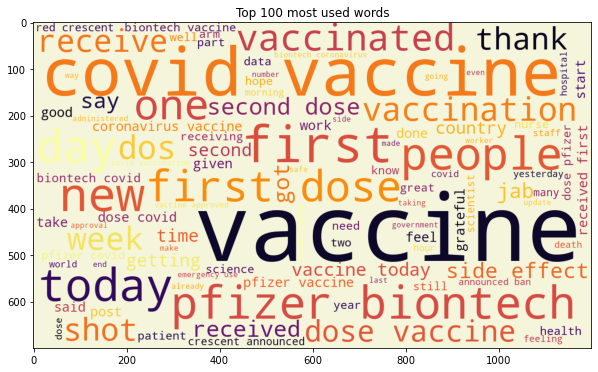

In [8]:
clean_tweets= "".join(tweets['Clean_Tweets'].values)
word_cloud = WordCloud(width=1200,height=700,
                       background_color='beige',colormap='inferno',
                       max_words=100).generate(clean_tweets)

plt.figure(figsize=[10,15])
plt.title("Top 100 most used words")
plt.imshow(word_cloud)
plt.show()

## Top 20 Hashtags

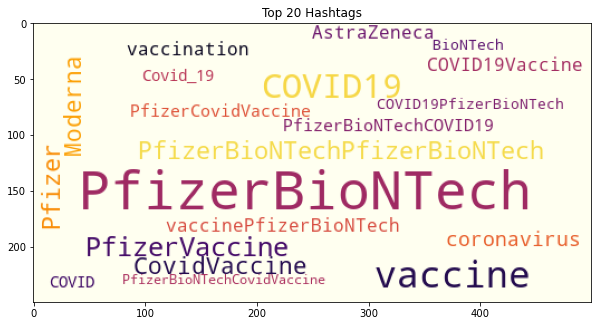

In [9]:
tweets['hashtags'] = tweets['hashtags'].astype('str')
tweets['clean_hashtags'] = tweets['hashtags'].apply(lambda x: x[1:-2])
tokens = [re.sub("'","",token) for token in tweets['clean_hashtags'].values]
clean_hashtag = "".join(tokens)
word_cloud = WordCloud(width=500,height=250,
                       background_color='ivory',colormap='inferno',
                       max_words=20).generate(clean_hashtag)

plt.figure(figsize=[10,15])
plt.imshow(word_cloud)
plt.title("Top 20 Hashtags")
plt.show()

## Number of Verified Users in the Tweet pool

Text(0.5, 1.0, 'Percentage of Verified Users')

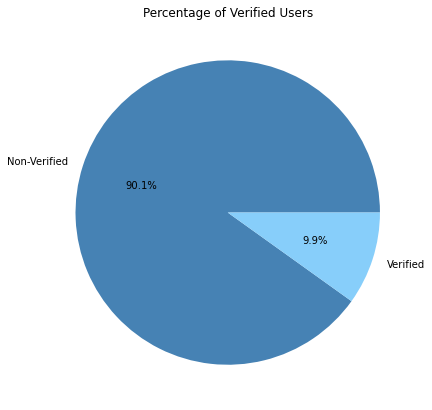

In [10]:
a = pd.DataFrame(tweets['user_verified'].value_counts())
plt.figure(figsize=(7,7))
plt.pie(a['user_verified'],
        labels=['Non-Verified','Verified'],
        autopct='%1.1f%%',
        colors=['steelblue','lightskyblue'])
plt.title("Percentage of Verified Users")

## Conclusion

* 'Vaccine', 'covid', 'vaccination', 'people' & 'first' are the most commonly used words in the Tweets
* Top hashtags are 'PfizerBioNTech', 'COVID19' & 'CovidVaccine'
* It is observed that 9.9% of the Tweets are from Verified Users of Twitter